#### symbolic pmf of U based on $m$ given

In [34]:
%display latex
V = var('V')
phi = var('Phi')

def computeU(m):
    U_mat = matrix(SR,m)
    U_mat[0,0] = 1
    
    for j in range(1,m):
        for k in range(j + 1): # if j = 1, k = 0 1
            if k < j:
                U_mat[j,k] = binomial(j,k) * (phi * V^(k+1))^(j-k) * U_mat[k,k]
            else: # k == j
                U_mat[j,j] = 1 - sum(U_mat[j,i] for i in range(j))
    
    return U_mat[-1,:]

In [35]:
computeU(4) # for checking

[                                                                                  Phi^3*V^3                                                                    -3*(Phi*V - 1)*Phi^2*V^4                                           3*(2*(Phi*V - 1)*Phi*V^2 - Phi^2*V^2 + 1)*Phi*V^3 3*(Phi*V - 1)*Phi^2*V^4 - Phi^3*V^3 - 3*(2*(Phi*V - 1)*Phi*V^2 - Phi^2*V^2 + 1)*Phi*V^3 + 1]

#### realization for different $m$ and $p$

In [36]:
m = 4
p = 27 / 100
tp = p * (m - 1) / (m - (m + 1) * p)
hp = p / (1 - p)
rho = 1 - hp

phi = exp(-rho / m)
V = exp(-rho * x / (m - 1))

U_vec = vector(computeU(m))

In [37]:
f(x) = e^(-tp) * sum(e^((1 - hp * (1 + u)) * x) * U_vec[u] for u in range(m))
f(x).simplify_full()

(3*(e^(311/219*x) - e^(230/219*x))*e^(46/73) + 3*(e^(346/219*x) - e^(184/219*x))*e^(69/146) + (6*(e^(46/73*x) - e^x)*e^(23/146) + e^(473/219*x) - 3*e^(100/73*x) - e^(230/219*x) + 6*e^(173/219*x) + 6*e^(46/73*x) - 6*e^(92/219*x) + e^(368/219*x + 69/146) - 3*e^x)*e^(23/73))*e^(-473/219*x - 42301/38690)

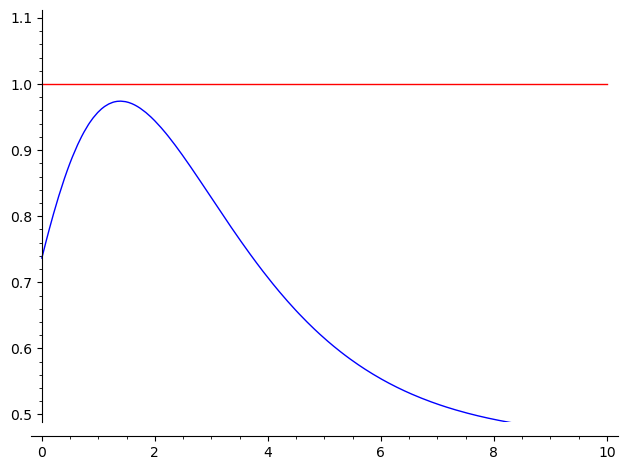

In [38]:
plot(f(x), (x,0,10), ymin = 0.5, ymax = 1.1) + plot(1, (x,0,10), ymin = 0.5, ymax = 1.1, color = 'red')

We substitute $x$ by $-219\log(y)$ below. Since we are considering $x > 0$, it suffices to consider all $y \in (0,1)$.

In [39]:
g(y) = f(x).subs(x == -219 * log(y))

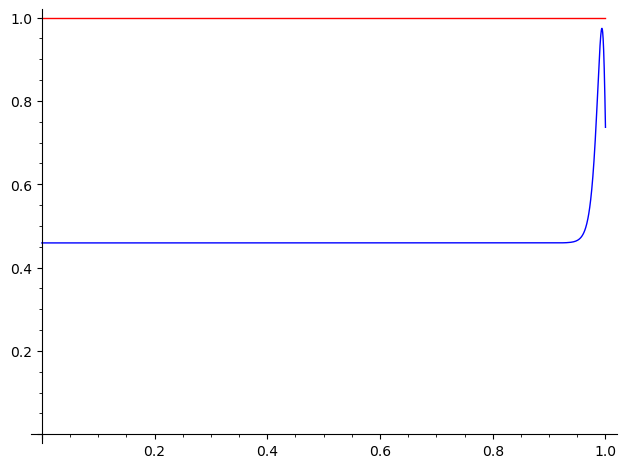

In [40]:
plot(g(y),(y,0,1), ymin = 0, ymax = 1) + plot(1, (y,0,1), ymin = 0, ymax = 1, color = 'red')

In [41]:
factor(diff(g(y)).full_simplify())

-3*(762*y^276 - 670*y^230*e^(23/146) - 670*y^230 - 600*y^195 + 289*y^184*e^(23/146) + 508*y^149*e^(23/146) + 254*y^149 + 243*y^138*e^(23/73) + 81*y^138 + 173*y^68 - 162*y^57*e^(23/73) - 127*y^22*e^(23/146) - 35*e^(69/146))*y^104*e^(-30111/38690)

In [42]:
# there seems to be no count_root function in SageMath
y_max = diff(g(y)).find_root(0.1,1)

In [43]:
g(y_max).n() # < 1

0.974094352397562

In [44]:
-219 * log(y_max) # original x_max

1.3888476364520281